In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from io import BytesIO
from ipywidgets import widgets
import numpy as np

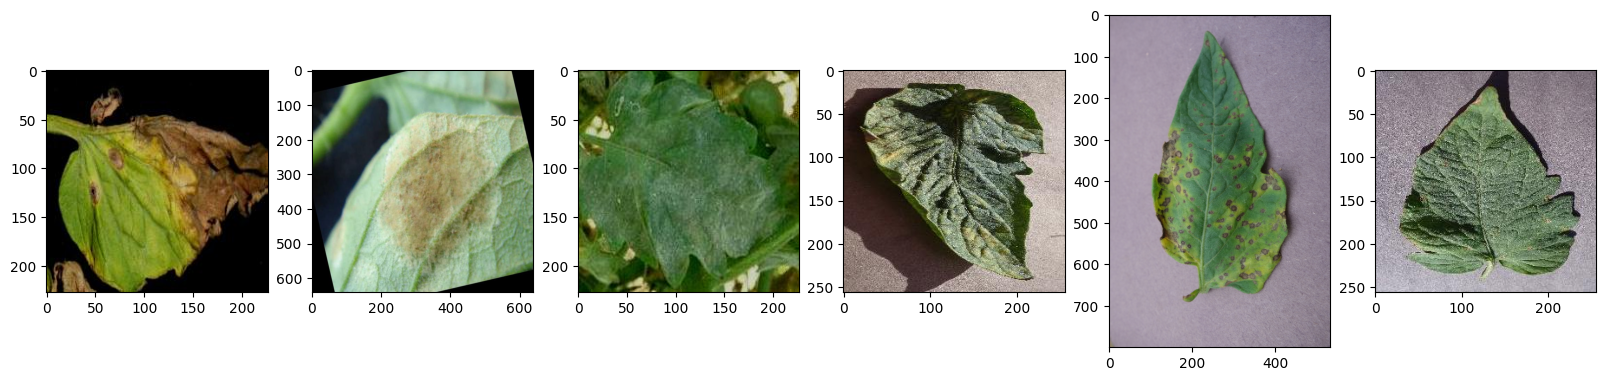

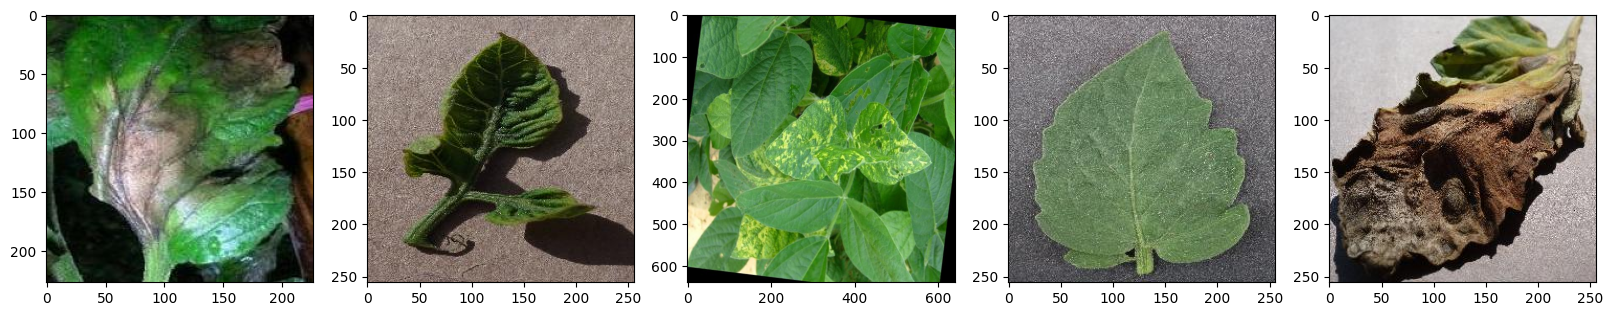

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/Capstone Bangkit/Capstone Bangkit/model/Tomato/train'
VALIDATION_DIR = '/content/drive/MyDrive/Capstone Bangkit/Capstone Bangkit/model/Tomato/valid'

train_bacterial_spot = os.path.join(TRAIN_DIR, 'Bacterial Spot')
train_leaf_mold = os.path.join(TRAIN_DIR, 'Leaf Mold')
train_spider_mite = os.path.join(TRAIN_DIR, 'Spider Mites')
train_septoria = os.path.join(TRAIN_DIR, 'Septoria Leaf Spot')
train_powdery = os.path.join(TRAIN_DIR, 'Powdery Mildew')
train_target_spot = os.path.join(TRAIN_DIR, 'Target Spot')
train_late_blight = os.path.join(TRAIN_DIR, 'Late Blight')
train_yellow_leaf = os.path.join(TRAIN_DIR, 'Tomato Yellow Leaf Curl Virus')
train_mosaic_virus = os.path.join(TRAIN_DIR, 'Tomato Mosaic Virus')
train_healthy = os.path.join(TRAIN_DIR, 'Healthy')
train_early_blight = os.path.join(TRAIN_DIR, 'Early Blight')

fig, ax = plt.subplots(1,6, figsize=(20,20))
fig, ax1 = plt.subplots(1,5, figsize=(20,20))
ax[0].imshow(tf.keras.utils.load_img(os.path.join(train_bacterial_spot, os.listdir(train_bacterial_spot)[0])))
ax[1].imshow(tf.keras.utils.load_img(os.path.join(train_leaf_mold, os.listdir(train_leaf_mold)[0])))
ax[2].imshow(tf.keras.utils.load_img(os.path.join(train_powdery, os.listdir(train_powdery)[0])))
ax[3].imshow(tf.keras.utils.load_img(os.path.join(train_spider_mite, os.listdir(train_spider_mite)[0])))
ax[4].imshow(tf.keras.utils.load_img(os.path.join(train_septoria, os.listdir(train_septoria)[0])))
ax[5].imshow(tf.keras.utils.load_img(os.path.join(train_target_spot, os.listdir(train_target_spot)[0])))
ax1[0].imshow(tf.keras.utils.load_img(os.path.join(train_late_blight, os.listdir(train_late_blight)[0])))
ax1[1].imshow(tf.keras.utils.load_img(os.path.join(train_yellow_leaf, os.listdir(train_yellow_leaf)[0])))
ax1[2].imshow(tf.keras.utils.load_img(os.path.join(train_mosaic_virus, os.listdir(train_mosaic_virus)[0])))
ax1[3].imshow(tf.keras.utils.load_img(os.path.join(train_healthy, os.listdir(train_healthy)[0])))
ax1[4].imshow(tf.keras.utils.load_img(os.path.join(train_early_blight, os.listdir(train_early_blight)[0])))

plt.show()

In [ ]:
 for i,v in enumerate(os.listdir(TRAIN_DIR)):
    print(f'{i+1}. {v}: {len(os.listdir(os.path.join(TRAIN_DIR, v)))}')

1. Tomato Yellow Leaf Curl Virus: 2036
2. Septoria Leaf Spot: 2881
3. Powdery Mildew: 1004
4. Target Spot: 1827
5. Late Blight: 3113
6. Leaf Mold: 2748
7. Healthy: 3048
8. Tomato Mosaic Virus: 2153
9. Early Blight: 2452
10. Bacterial Spot: 2826
11. Spider Mites: 1747


##Trasfer Learning##

Loading pre-trained weight from `inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5` model

In [ ]:
pre_trained_weight = '/content/drive/MyDrive/Capstone Bangkit/Capstone Bangkit/model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape = (150,150,3),
    include_top = False,
    weights = None
)

pre_trained_model.load_weights(pre_trained_weight)

pre_trained_model.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

Dense Layer

In [ ]:
model=  tf.keras.layers.Flatten()(last_output)
model = tf.keras.layers.Rescaling(1./255)(model)
model = tf.keras.layers.Dense(128, activation='relu')(model)
model = tf.keras.layers.Dropout(0.2)(model)
model = tf.keras.layers.Dense(11, activation='softmax')(model)


model = tf.keras.Model(pre_trained_model.input, model)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0][0

Load training and validation dataset

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(150,150),
    batch_size= 64,
    label_mode= 'categorical'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    image_size=(150,150),
    batch_size= 64,
    label_mode= 'categorical'
)

Found 25835 files belonging to 11 classes.
Found 6678 files belonging to 11 classes.


##Preporocessing##
Rescale pixels of an image to a range of 0-255

In [ ]:
def preprocess(image,label):
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

train_scaled = train_dataset.map(preprocess)
validation_scaled = validation_dataset.map(preprocess)

Augmentation

In [ ]:
Augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomTranslation(0.5, 0.5),
    tf.keras.layers.RandomZoom(0.2),
])


inputs = tf.keras.Input(shape=(150, 150,3))
aug = Augmentation(inputs)
aug = model(aug)

Optimization

In [ ]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# Optimize the datasets for training
train_final = (train_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       # .batch(BATCH_SIZE)
                       )

val_final = (validation_scaled
                      .cache()
                      .prefetch(PREFETCH_BUFFER_SIZE)
                      # .batch(BATCH_SIZE)
                      )

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Callback

In [ ]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if logs['accuracy'] >= 0.99 and logs['val_accuracy'] >= 0.91:
            self.model.stop_training = True

Training the model

In [ ]:
history = model.fit(
    train_final,
    validation_data=val_final,
    epochs = 25,
    callbacks = [EarlyStoppingCallback()]
)

Epoch 1/25
404/404 [==============================] - 1133s 2s/step - loss: 1.6230 - accuracy: 0.5354 - val_loss: 1.0451 - val_accuracy: 0.7093
Epoch 2/25
404/404 [==============================] - 827s 2s/step - loss: 0.8661 - accuracy: 0.7450 - val_loss: 0.6864 - val_accuracy: 0.7974
Epoch 3/25
404/404 [==============================] - 826s 2s/step - loss: 0.6101 - accuracy: 0.8208 - val_loss: 0.5399 - val_accuracy: 0.8431
Epoch 4/25
404/404 [==============================] - 817s 2s/step - loss: 0.4717 - accuracy: 0.8638 - val_loss: 0.4563 - val_accuracy: 0.8685
Epoch 5/25
404/404 [==============================] - 824s 2s/step - loss: 0.3801 - accuracy: 0.8919 - val_loss: 0.4032 - val_accuracy: 0.8802
Epoch 6/25
404/404 [==============================] - 814s 2s/step - loss: 0.3071 - accuracy: 0.9171 - val_loss: 0.3658 - val_accuracy: 0.8880
Epoch 7/25
404/404 [==============================] - 813s 2s/step - loss: 0.2521 - accuracy: 0.9345 - val_loss: 0.3348 - val_accuracy: 0.898

Evaluation

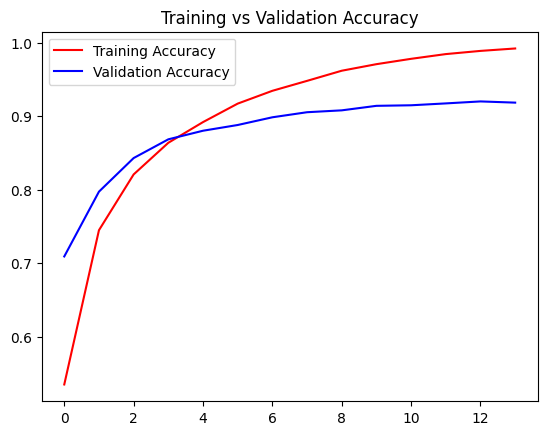

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend(loc=0)
plt.show()

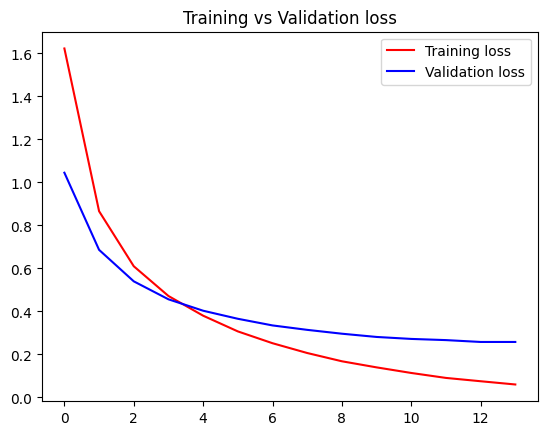

In [ ]:
# Plot the training loss for each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training vs Validation loss')
plt.legend(loc=0)
plt.show()

A function for creating the prediction and printing the output

In [ ]:
import io
import ipywidgets as widgets
from IPython.display import display

uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):

    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    # image = image/255.0
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    image = np.expand_dims(image, axis=0)
    interpreter.set_tensor(input_details['index'], image)
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_details['index'])[0]

    with out:

        print(f'\nmodel output: {prediction}')

        prediction_index = np.argmax(prediction)

        classes = ["Bacterial Spot","Early Blight","Healthy","Late Blight","Leaf Mold","Powdery Mildew",
                   "Septoria Leaf Spot","Spider Mites","Target Spot","Tomato Mosaic Virus",
                   "Tomato Yellow Leaf Curl Virus" ]

        predicted_class = classes[prediction_index]

        print(f'{filename} is {predicted_class}')


def on_upload_change(change):
    """A function for getting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)

    for name, file_info in change['new'].items(): # Access file information using the name as key
        # Create a BytesIO object from the file content
        file_jpgdata = io.BytesIO(file_info['content'])
        file_predict(name, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

**Save model to an h5 file**

In [ ]:
model.save('/content/drive/MyDrive/Capstone Bangkit/Capstone Bangkit/model/Tomat.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Convert model into tflite model**

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.int8
# converter.inference_output_type = tf.int8
tflite_model = converter.convert()

open('/content/drive/MyDrive/Capstone Bangkit/Capstone Bangkit/model/Tomat.tflite', 'wb').write(tflite_model)

55138320